# Home Assignment 1

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/Computer Intensive Methods

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/Computer Intensive Methods


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy.stats import multivariate_normal

## Problem 1
We have 
\begin{equation}
\mathbf{X}_{n+1} = \mathbf{\Phi}\mathbf{X}_{n}+\mathbf{\Psi}_{z}\mathbf{Z}_n+\mathbf{\Psi}_{w}\mathbf{W}_n=
\\= \begin{bmatrix}1 & \Delta_{t} & \Delta_{t}^2/2 & 0 & 0 & 0 \\ 0 & 1 & \Delta_{t} & 0 & 0 & 0 \\ 0 & 0 & \alpha  & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & \Delta_{t} & \Delta_{t}^2/2 \\ 0 & 0 & 0 & 0 & 1 & \Delta_{t} \\ 0 & 0 & 0 & 0 & 0 & \alpha\end{bmatrix} \begin{bmatrix} X_n^1 \\ \dot{X}_n^1 \\ \ddot{X}_n^1 \\  X_n^2 \\ \dot{X}_n^2 \\ \ddot{X}_n^2\end{bmatrix} + \begin{bmatrix} \Delta_{t}^2/2 & 0 \\ \Delta_{t} & 0 \\ 0 & 0 \\ 0 & \Delta_{t}^2/2 \\ 0 & \Delta_{t} \\ 0 & 0\end{bmatrix} \begin{bmatrix} Z_n^1 \\ Z_n^2 \end{bmatrix} + \begin{bmatrix} \Delta_{t}^2/2 & 0 \\ \Delta_{t} & 0 \\ 1 & 0 \\ 0 & \Delta_{t}^2/2 \\ 0 & \Delta_{t} \\ 0 & 1\end{bmatrix} \begin{bmatrix} W_n^1 \\ W_n^2 \end{bmatrix} =
\\ = \begin{bmatrix} X_n^1 + \Delta_{t}\dot{X}_n^1 + \frac{1}{2}\Delta^2_{t}\ddot{X}_n^1 + \frac{1}{2}\Delta^2_{t} Z_n^1 + \frac{1}{2}\Delta^2_{t}W_n^1 \\ \dot{X}_n^1 + \Delta_{t}\ddot{X}_n^1 + \Delta_{t}Z_n^1 + \Delta_{t}W_n^1 \\ \alpha\ddot{X}_n^1 + W_n^1 \\ X_n^2 + \Delta_{t}\dot{X}_n^2 + \frac{1}{2}\Delta^2_{t}\ddot{X}_n^2 + \frac{1}{2}\Delta^2_{t} Z_n^2 + \frac{1}{2}\Delta^2_{t}W_n^2 \\ \dot{X}_n^2 + \Delta_{t}\ddot{X}_n^2 + \Delta_{t}Z_n^2 + \Delta_{t}W_n^2 \\ \alpha\ddot{X}_n^2 + W_n^2\end{bmatrix}
\end{equation}
where:
\begin{equation}
W_n\sim N(0_{2\times2},\sigma^2\mathbf{I}_{2\times2})
\end{equation}
Therefore, we have that:
\begin{equation}
\mathbf{X}_{n+1}\mid\mathbf{X}_{n},\mathbf{Z}_{n} \sim N(\mathbf{\Phi}\mathbf{X}_{n}+\mathbf{\Psi}_{z}\mathbf{Z}_n,\mathbf{\Psi}_{w}(\sigma^2\mathbf{I}_{2\times2})\mathbf{\Psi}_{w}^T)
\end{equation}
Hence, we can deduce that $\{\mathbf{X}_n\}_n$ is not a Markov chain as the distribution of $\mathbf{X}_{n+1}$ depends upon $\mathbf{Z}_n$, and not only upon $\mathbf{X}_{n}$. On the other hand, $\{\mathbf{\tilde{X}}_n\}_n:=\{\mathbf{X}_n,\mathbf{Z}_n\}_n$ is a Markov chain with transition kernel given by:
\begin{equation}
\mathbf{X}_{n+1}\mid\mathbf{X}_{n},\mathbf{Z}_{n} \sim N(\mathbf{\Phi}\mathbf{X}_{n}+\mathbf{\Psi}_{z}\mathbf{Z}_n,\mathbf{\Psi}_{w}(\sigma^2\mathbf{I}_{2\times2})\mathbf{\Psi}_{w}^T)
\end{equation}
\begin{equation}
\mathbf{Z}_{n+1}\mid\mathbf{Z}_n\sim P\mathbf{Z}_n
\end{equation}

In [3]:
# Load data
stations = scipy.io.loadmat('stations.mat')["pos_vec"]
stations = np.moveaxis(stations,source = 1, destination = 0)
stations = np.expand_dims(stations, axis = 2)
Y_meas = scipy.io.loadmat('RSSI-measurements.mat')["Y"]
Y_meas_unknown_sigma = scipy.io.loadmat('RSSI-measurements-unknown-sigma.mat')["Y"]

In [4]:
def simulate_trajectory(m = 200, X0_var = np.sqrt(np.array([500,5,5,200,5,5]).reshape(6,-1)), alpha = 0.6, sigma = 0.5, delta_t = 0.5):
  # Define the vector/matrices
  Z_vals = np.array([[[0],[0]],[[3.5],[0]],[[0],[3.5]],[[0],[-3.5]],[[-3.5],[0]]])
  Z_transition = (np.array([16,1,1,1,1,1,16,1,1,1,1,1,16,1,1,1,1,1,16,1,1,1,1,1,16])/20).reshape(5,5)
  psi_Z = np.array([1/2*delta_t**2,0,delta_t,0,0,0,0,1/2*delta_t**2,0,delta_t,0,0]).reshape(6,2)
  psi_W = np.array([1/2*delta_t**2,0,delta_t,0,1,0,0,1/2*delta_t**2,0,delta_t,0,1]).reshape(6,2)
  phi = np.array([1,delta_t,1/2*delta_t**2,0,0,0,0,1,delta_t,0,0,0,0,0,alpha,0,0,0,0,0,0,1,delta_t,1/2*delta_t**2,0,0,0,0,1,delta_t,0,0,0,0,0,alpha]).reshape(6,6)

  # Simulate the first step
  X = np.random.normal(0,X0_var)
  Z_index = np.array(np.random.randint(0,5)).reshape(1)
  
  for i in range(m-1): # Simulate the trajectory
    W = np.random.normal(0,sigma,2).reshape(2,-1)
    X = np.concatenate((X,np.matmul(phi,X[:,-1]).reshape(6,-1) + np.matmul(psi_Z,Z_vals[Z_index[-1],:,:]) + np.matmul(psi_W, W)),axis = 1)
    Z_index = np.concatenate((Z_index, np.random.choice(np.arange(0, 5), p=Z_transition[Z_index[-1],]).reshape(1)), axis = 0)
  
  return X

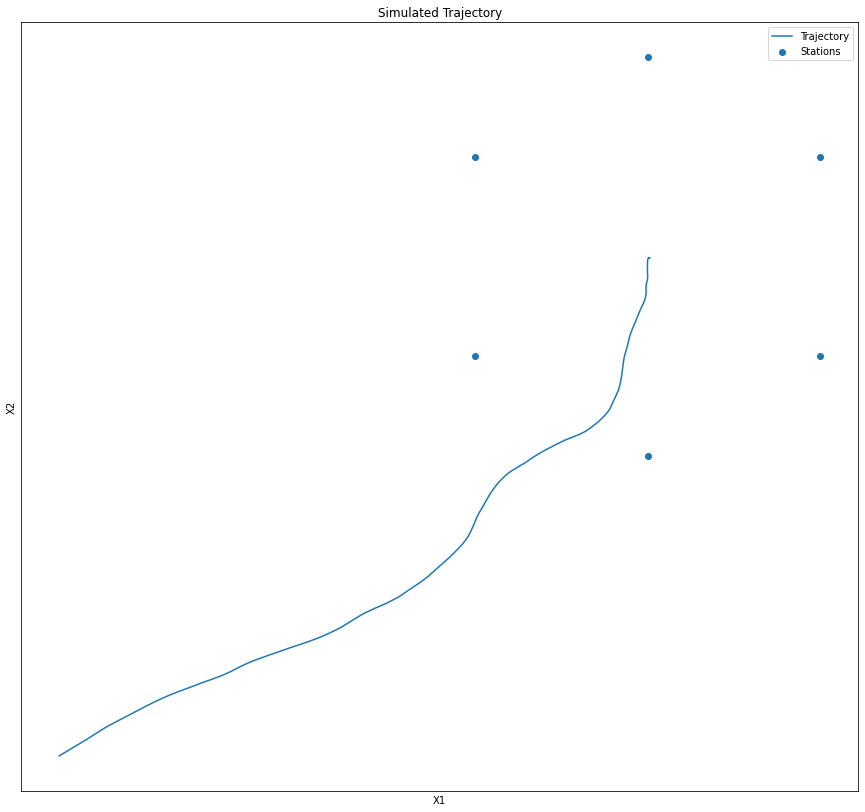

In [5]:
X = simulate_trajectory(m = 500)
plt.figure(figsize = (15,15))
plt.title("Simulated Trajectory")
plt.plot(X[0,:],X[3,:],label = "Trajectory")
plt.scatter(stations[:,0],stations[:,1],label = "Stations")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().axes.xaxis.set_ticks([])
plt.gca().axes.yaxis.set_ticks([])
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("Simulated_Trajectory.pdf")
plt.show()

The obtained trajectory is a reasonable path a car would follow.

## Problem 2
Since $\{\mathbf{\tilde{X}}_n\}_n$ is a Markov chain, it is straightforward to realize that $\{\mathbf{\tilde{X}}_n,\mathbf{Y}_n\}_n$ is an hidden Markov model where $\{\mathbf{Y}_n\}_n$ is the observable process and $\{\mathbf{\tilde{X}}_n\}_n$ is the hidden state. We know that:
\begin{equation}
Y_n^l=v-10\eta \log_{10}{\lVert (X_n^1,X_n^2) - \mathbf{\pi}_l \rVert} + V_n^l,V_n^l\stackrel{iid}\sim N(0,\varsigma^2)
\end{equation}
Therefore, the transition density $p(\mathbf{y}_n\mid\mathbf{\tilde{x}}_n)$ is given by:
\begin{equation}
p(\mathbf{y}_n\mid\mathbf{\tilde{x}}_n) = N(\mathbf{y}_n;[v-10\eta \log_{10}{\lVert (X_n^1,X_n^2) - \mathbf{\pi}_l \rVert}]_{l=1,...,6},\varsigma^2\mathbf{I}_{6\times6})
\end{equation}

## Problem 3
In order to implement a SIS scheme, we use the instrumental density $g(\mathbf{\tilde{x}}_{0:n};\mathbf{\tilde{x}}_{n+1})=q(\mathbf{\tilde{x}}_{n+1}\mid\mathbf{\tilde{x}}_{n})$ as computed in Problem $1$. In particular, such choice corresponds to the following weights update formula:
\begin{equation}
\omega^i_{n+1} = p(\mathbf{y}_n\mid\mathbf{x}_n^i) \times \omega^i_{n} = N(\mathbf{y}_n;[v-10\eta \log_{10}{\lVert (X_n^1,X_n^2)^i - \mathbf{\pi}_l \rVert}]_{l=1,...,6},\varsigma^2\mathbf{I}_{6\times6}) \times \omega^i_{n}
\end{equation}
The position at time $k$ is simply estimated as:
\begin{equation}
\mathbf{\tau}_N^k=\sum_{i=1}^N{\frac{\omega_k^i}{\Omega_k}\mathbf{X}^{pos,i}_k}
\end{equation}
where $\mathbf{X}^{pos}_k=\begin{bmatrix} X_k^1 \\ X_k^2\end{bmatrix}$.

In [6]:
def generate_Y(position, stations, varsigma = 1.5, v = 90, eta = 3):
  n_stations = stations.shape[0]
  mean = np.zeros(shape = (n_stations,1))
  for i in range(n_stations):
    mean[i,:] = v - 10*eta*np.log10(np.linalg.norm(position - stations[i,:,:]))
  Y = np.random.normal(mean,varsigma).reshape(n_stations,-1)
  return Y

In [7]:
def simulate_data(stations, m = 200, X0_var = np.sqrt(np.array([500,5,5,200,5,5]).reshape(6,-1)), alpha = 0.6, sigma = 0.5, delta_t = 0.5,varsigma = 1.5,v = 90,eta = 3):
  # Define the vector/matrices
  Z_vals = np.array([[[0],[0]],[[3.5],[0]],[[0],[3.5]],[[0],[-3.5]],[[-3.5],[0]]])
  Z_transition = (np.array([16,1,1,1,1,1,16,1,1,1,1,1,16,1,1,1,1,1,16,1,1,1,1,1,16])/20).reshape(5,5)
  psi_Z = np.array([1/2*delta_t**2,0,delta_t,0,0,0,0,1/2*delta_t**2,0,delta_t,0,0]).reshape(6,2)
  psi_W = np.array([1/2*delta_t**2,0,delta_t,0,1,0,0,1/2*delta_t**2,0,delta_t,0,1]).reshape(6,2)
  phi = np.array([1,delta_t,1/2*delta_t**2,0,0,0,0,1,delta_t,0,0,0,0,0,alpha,0,0,0,0,0,0,1,delta_t,1/2*delta_t**2,0,0,0,0,1,delta_t,0,0,0,0,0,alpha]).reshape(6,6)

  # Simulate the first step
  X = np.random.normal(0,X0_var)
  Z_index = np.array(np.random.randint(0,5)).reshape(1)
  position = X[[0,3],-1].reshape(2,-1)
  Y = generate_Y(position,stations,varsigma = varsigma,v = v, eta = eta)

  for i in range(m-1): # Simulate the trajectory
    W = np.random.normal(0,sigma,2).reshape(2,-1)
    X = np.concatenate((X,np.matmul(phi,X[:,-1]).reshape(6,-1) + np.matmul(psi_Z,Z_vals[Z_index[-1],:,:]) + np.matmul(psi_W, W)),axis = 1)
    Z_index = np.concatenate((Z_index, np.random.choice(np.arange(0, 5), p=Z_transition[Z_index[-1],]).reshape(1)), axis = 0)
    position = X[[0,3],-1].reshape(2,-1)
    Y = np.concatenate((Y,generate_Y(position,stations,varsigma = varsigma,v = v, eta = eta)),axis = 1)
  
  return X, Y

In [8]:
def compute_weights(Y,stations,position,v = 90,eta = 3,varsigma = 1.5):
  n_stations = stations.shape[0]
  N = position.shape[0]
  mean = np.zeros(shape = (N,n_stations,1))
  for i in range(n_stations):
    mean[:,i,:] = v - 10*eta*np.log10(np.linalg.norm(position - stations[i,:,:], axis = 1))
  cov = np.diag(np.repeat(varsigma**2,n_stations))
  weights = np.zeros(shape = (N))
  for i in range(N):
    weights[i] = multivariate_normal.pdf(Y,mean[i,:,:].reshape(n_stations),cov)
  return weights

In [9]:
def generate_Z_index(probs):
  N = probs.shape[0]
  Z_index = (probs.cumsum(1) > np.random.rand(N)[:,None]).argmax(1).reshape(N,1)
  return Z_index

In [10]:
def update_XZ(X,Z_index,alpha = 0.6, sigma = 0.5, delta_t = 0.5):
  N = X.shape[0]
  # Define the vector/matrices
  Z_vals = np.array([[[0],[0]],[[3.5],[0]],[[0],[3.5]],[[0],[-3.5]],[[-3.5],[0]]])
  Z_transition = (np.array([16,1,1,1,1,1,16,1,1,1,1,1,16,1,1,1,1,1,16,1,1,1,1,1,16])/20).reshape(5,5)
  psi_Z = np.array([1/2*delta_t**2,0,delta_t,0,0,0,0,1/2*delta_t**2,0,delta_t,0,0]).reshape(6,2)
  psi_W = np.array([1/2*delta_t**2,0,delta_t,0,1,0,0,1/2*delta_t**2,0,delta_t,0,1]).reshape(6,2)
  phi = np.array([1,delta_t,1/2*delta_t**2,0,0,0,0,1,delta_t,0,0,0,0,0,alpha,0,0,0,0,0,0,1,delta_t,1/2*delta_t**2,0,0,0,0,1,delta_t,0,0,0,0,0,alpha]).reshape(6,6)
  
  # Update X
  W = np.random.normal(0,sigma,(N,2,1))
  X = np.concatenate((X,np.matmul(phi,X[:,:,-1].reshape(N,6,1)) + np.matmul(psi_Z,Z_vals[Z_index[:,-1],:,:]) + np.matmul(psi_W, W)), axis = 2)
  Z_index = np.concatenate((Z_index,generate_Z_index(Z_transition[Z_index[:,-1],])),axis = 1)
  
  return X, Z_index

In [11]:
def sequential_importance_sampling(Y,stations,N = 100,m = 200,X0_var = np.sqrt(np.array([500,5,5,200,5,5]).reshape(6,-1)),alpha = 0.6,sigma = 0.5,delta_t = 0.5,v = 90,eta = 3,varsigma = 1.5):
  X = np.random.normal(0,X0_var,(6,N)).reshape(6,-1,N)
  X = np.moveaxis(X,source=2,destination=0)
  position = X[:,[0,3],-1].reshape(N,2,1)
  Z_index = np.array(np.random.randint(0,5,size = (N,1)))
  weights = compute_weights(Y[:,0],stations,position,v = v,eta = eta,varsigma = varsigma)
  weights = np.expand_dims(weights,axis = 0)
  weights[-1,] = weights[-1,] / np.max(weights[-1,])
  tau = np.average(X[:,:,-1], axis = 0, weights = weights[-1,:]).reshape(6,-1)

  for k in range(m-1):
    X, Z_index = update_XZ(X,Z_index,alpha = alpha,sigma = sigma,delta_t = delta_t)
    position = X[:,[0,3],-1].reshape(N,2,1)
    weights = np.vstack((weights,compute_weights(Y[:,k],stations,position,v = v,eta = eta,varsigma = varsigma) * weights[-1,:]))
    weights[-1,] = weights[-1,] / np.max(weights[-1,])
    tau = np.hstack((tau,np.average(X[:,:,-1], axis = 0, weights = weights[-1,:]).reshape(6,-1)))

  return tau, weights

First, let us test the SIS scheme implemented on some artificially simulated data. In particular, we generate a sequence of length m = 500, use the simulated $\mathbf{Y}$'s to estimate the hidden state of the chain and then compare the results with the true simulated trajectory. 

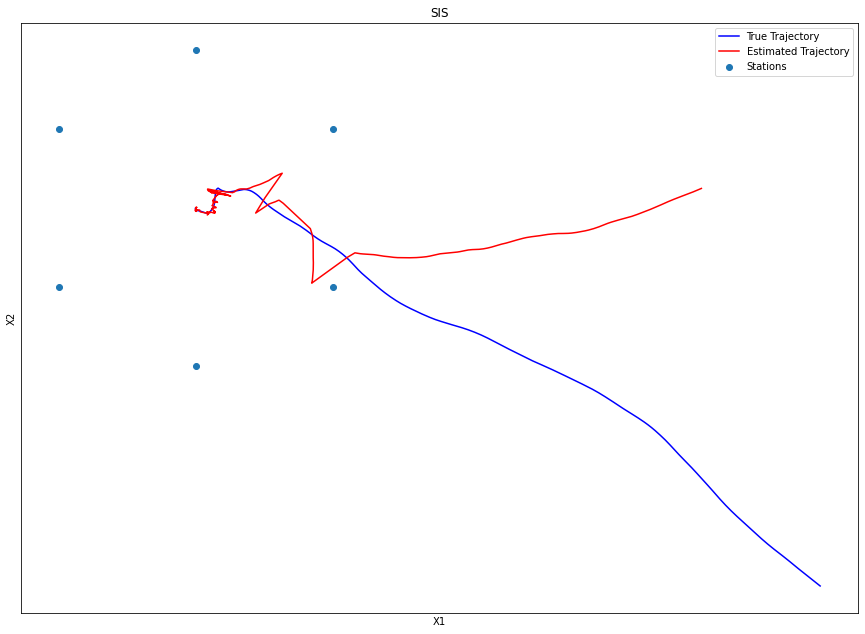

In [12]:
N = 1000
m = 500
X, Y = simulate_data(stations,m = m)
tau, weights = sequential_importance_sampling(Y,stations,m = m,N = N)

plt.figure(figsize = (15,15))
plt.title("SIS")
plt.plot(X[0,:],X[3,:],color = "b",label = "True Trajectory")
plt.plot(tau[0,:],tau[3,:],color = "r",label = "Estimated Trajectory")
plt.scatter(stations[:,0],stations[:,1],label = "Stations")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().axes.xaxis.set_ticks([])
plt.gca().axes.yaxis.set_ticks([])
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("SIS_Simulated_Data.pdf")
plt.show()

The results obtained are not satisfying. This is explained by the weight decay problem of the SIS scheme, as shown in the following histograms of the weights.

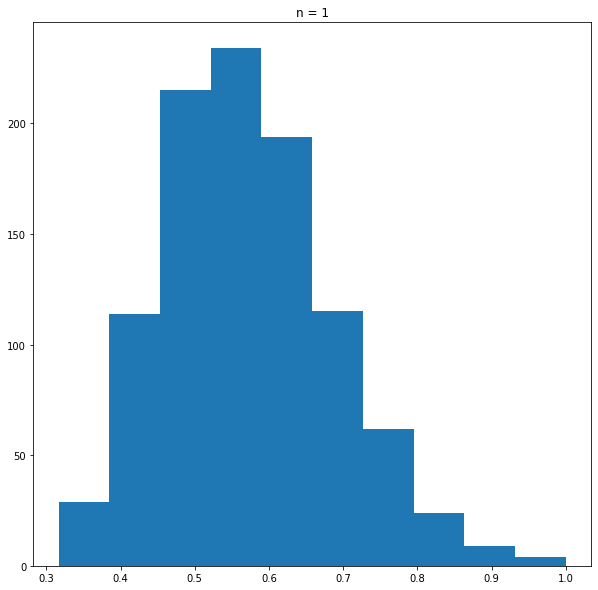

In [13]:
plt.figure(figsize = (10,10))
plt.title("n = 1")
plt.hist(weights[1,])
plt.show()

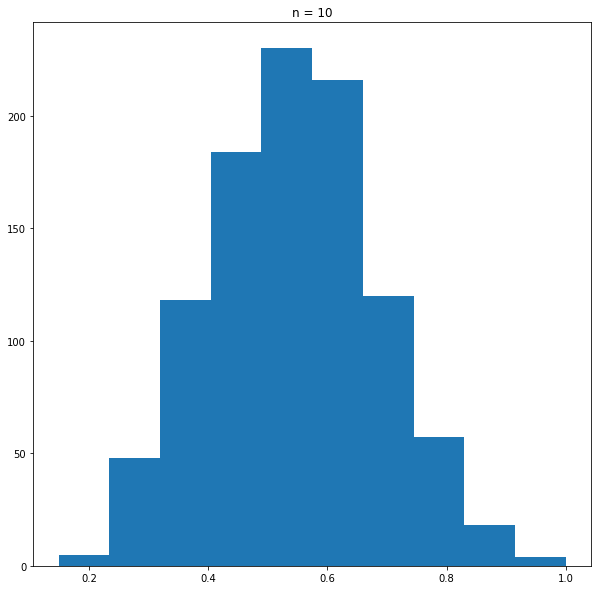

In [14]:
plt.figure(figsize = (10,10))
plt.title("n = 10")
plt.hist(weights[10,])
plt.show()

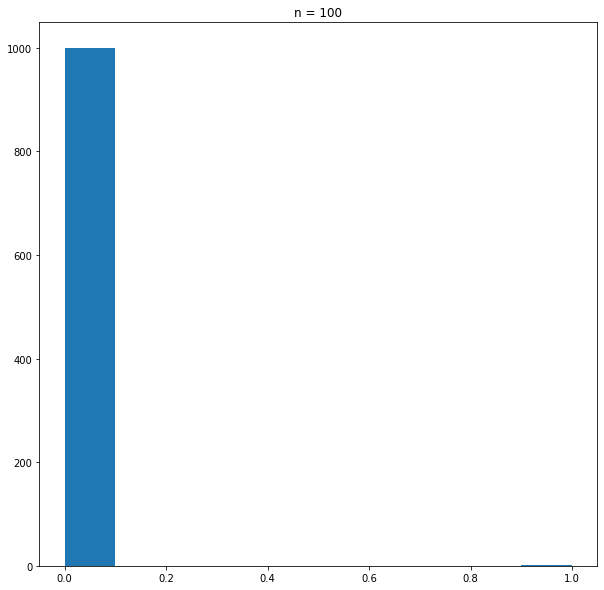

In [15]:
plt.figure(figsize = (10,10))
plt.title("n = 100")
plt.hist(weights[100,])
plt.show()

## Problem 4
We now introduce a resempling step in the algorithm in order to implement the SISR scheme. Moeover, the probability of the driving command at time $k$ being equal to $l$ is estimated as:
\begin{equation}
\mathbf{\tau}_N^{k,l}=\sum_{i=1}^N{\frac{\omega_k^i}{\Omega_k}\mathbf{I}_{(\mathbf{Z}_k^i=l)}}
\end{equation}
Therefore, the most probable driving command is estimated as the $l$ corresponding to the largest value of $\mathbf{\tau}_N^{k,l}$.

In [16]:
def find_most_probable(Z_index,weights):
  Z_dict = {0: "Still", 1: "East", 2: "North", 3: "West", 4: "South"}
  best = 0
  result = None
  for element in np.unique(Z_index[:,-1]):
    indices = np.where(Z_index[:,-1] == element)
    total_weight = np.sum(weights[-1,indices])
    if total_weight > best:
      best = total_weight
      result = element
  return np.array(Z_dict[result])

In [17]:
def sequential_importance_sampling_resampling(Y,stations,N = 100,m = 200,X0_var = np.sqrt(np.array([500,5,5,200,5,5]).reshape(6,-1)),alpha = 0.6,sigma = 0.5,delta_t = 0.5,v = 90,eta = 3,varsigma = 1.5):
  X = np.random.normal(0,X0_var,(6,N)).reshape(6,-1,N)
  X = np.moveaxis(X,source=2,destination=0)
  position = X[:,[0,3],-1].reshape(N,2,1)
  Z_index = np.array(np.random.randint(0,5,size = (N,1)))
  weights = compute_weights(Y[:,0],stations,position,v = v,eta = eta,varsigma = varsigma)
  weights = np.expand_dims(weights,axis = 0)
  tau = np.average(X[:,:,-1], axis = 0, weights = weights[-1,:]).reshape(6,-1)
  tau_most_probable = find_most_probable(Z_index,weights)

  for k in range(m-1):
    indices = np.random.choice(np.arange(N),size = N, replace = True, p = weights[-1,] / np.sum(weights[-1,]))
    X[:,:,-1] = X[indices,:,-1]
    Z_index[:,-1] = Z_index[indices,-1]
    X, Z_index = update_XZ(X,Z_index)
    position = X[:,[0,3],-1].reshape(N,2,1)
    weights = np.vstack((weights,compute_weights(Y[:,k],stations,position,v = v,eta = eta,varsigma = varsigma)))
    tau = np.hstack((tau,np.average(X[:,:,-1], axis = 0, weights = weights[-1,:]).reshape(6,-1)))
    tau_most_probable = np.append(tau_most_probable,find_most_probable(Z_index,weights))

  return tau, weights, tau_most_probable

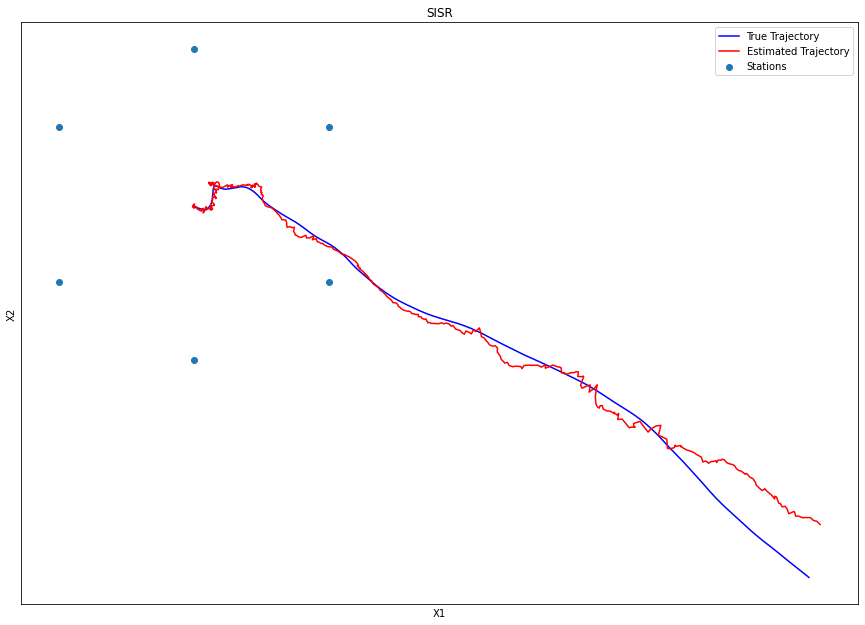

In [18]:
tau, weights, tau_most_probable = sequential_importance_sampling_resampling(Y,stations, m = m, N = N)

plt.figure(figsize = (15,15))
plt.title("SISR")
plt.plot(X[0,:],X[3,:],color = "b",label = "True Trajectory")
plt.plot(tau[0,:],tau[3,:],color = "r",label = "Estimated Trajectory")
plt.scatter(stations[:,0],stations[:,1],label = "Stations")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().axes.xaxis.set_ticks([])
plt.gca().axes.yaxis.set_ticks([])
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("SISR_Simulated_Data.pdf")
plt.show()

As we can see, the results obtained via the SISR scheme are much better. Moreover, the following histograms also show that the weight decay problem is now solved.

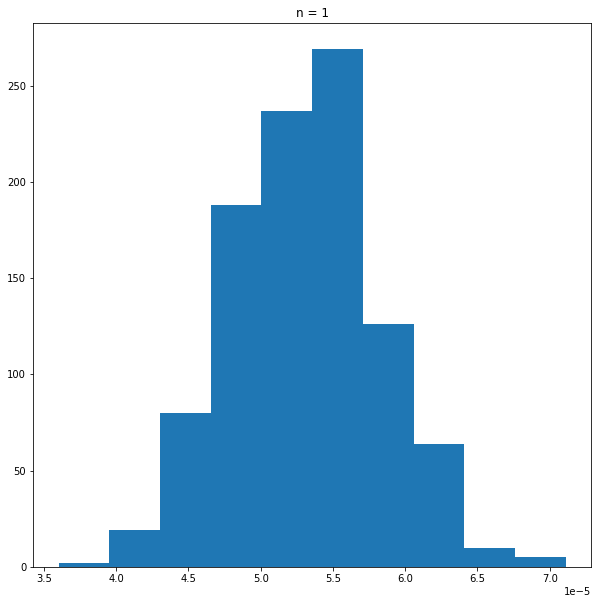

In [19]:
plt.figure(figsize = (10,10))
plt.title("n = 1")
plt.hist(weights[1,])
plt.show()

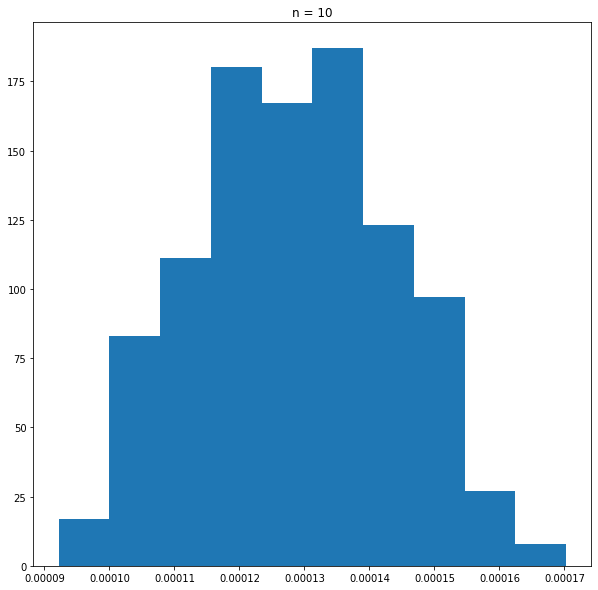

In [20]:
plt.figure(figsize = (10,10))
plt.title("n = 10")
plt.hist(weights[10,])
plt.show()

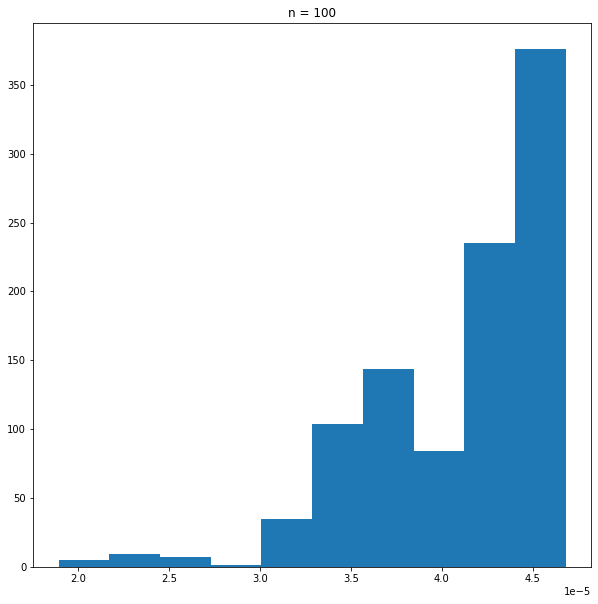

In [21]:
plt.figure(figsize = (10,10))
plt.title("n = 100")
plt.hist(weights[100,])
plt.show()

Finally, we can run the SISR scheme on the real data and plot the results.

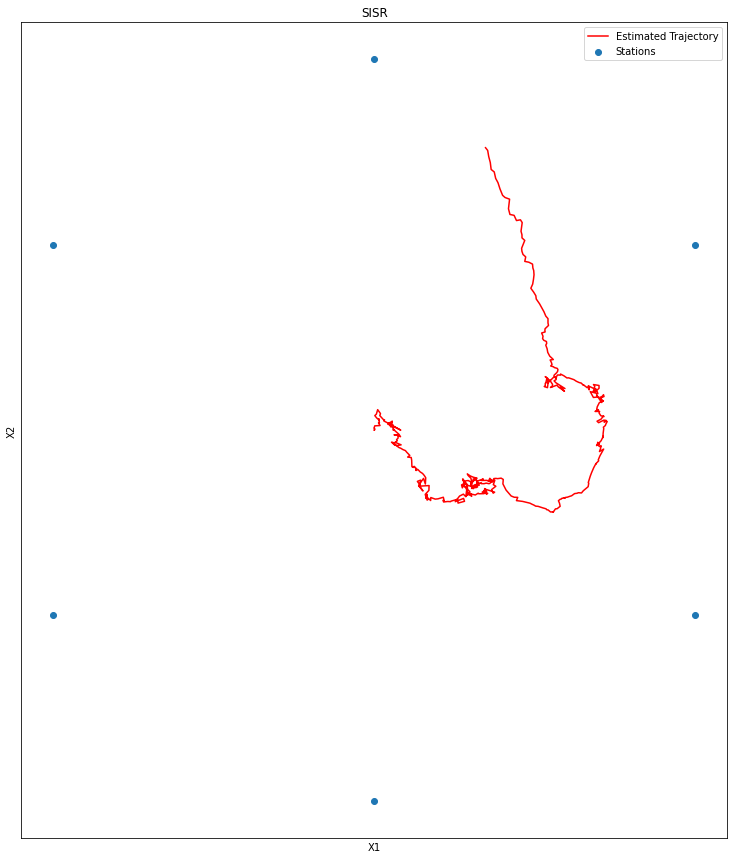

In [22]:
tau, weights, tau_most_probable = sequential_importance_sampling_resampling(Y_meas,stations, m = 501, N = 1000)

plt.figure(figsize = (15,15))
plt.title("SISR")
plt.plot(tau[0,:],tau[3,:],color = "r",label = "Estimated Trajectory")
plt.scatter(stations[:,0],stations[:,1],label = "Stations")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().axes.xaxis.set_ticks([])
plt.gca().axes.yaxis.set_ticks([])
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("SISR_Real_Data.pdf")
plt.show()

In [23]:
np.savetxt("driving_commands.csv", tau_most_probable, delimiter=",", fmt='%s')

## Problem 5
The log-likelihood is given by:
\begin{equation}
l_m(\varsigma,\mathbf{y}_{0:m})=m^{-1}\log{L_m(\varsigma,\mathbf{y}_{0:m})}
\end{equation}
where $L_m(\varsigma,\mathbf{y}_{0:m})$ is the normalizing constant of the smoothing distribution. Such constant can be estimated by the following unbiased estimator:
\begin{equation}
c_{N,m}^{SISR}=\frac{1}{N^{m+1}}\prod_{k=0}^m{\Omega_k}
\end{equation}
where $\Omega_k = \sum_i^N{\omega_k^i}$.

In [24]:
def log_likelihood(weights,m = 200,N = 100):
  omega = np.sum(weights, axis = 1)
  log_constant = np.sum(np.log(omega)) + (m+1) * N
  result = log_constant / m
  return result

As before, we first test the algorithm on the previously simulated data. In particular, we estimate the parameter $\varsigma$ via maximum likelihood estimation and assess that such estimate is fairly close to the true value of $1.5$.

In [25]:
candidates = np.linspace(0.5,3,25)
log_likelihoods = np.zeros(shape = (25))
m = 500
N = 200

for i,candidate in enumerate(candidates):
  tau, weights, tau_most_probable = sequential_importance_sampling_resampling(Y,stations, m = m, N = N,varsigma = candidate)
  log_likelihoods[i] = log_likelihood(weights,m = m,N = N)

In [26]:
print("The best candidate is: ",candidates[np.argmax(log_likelihoods)])

The best candidate is:  1.5416666666666667


Since the results are satisfying, we now run the algorithm on the real data.

In [27]:
candidates = np.linspace(0.5,3,25)
log_likelihoods = np.zeros(shape = (25))
m = 501
N = 200

for i,candidate in enumerate(candidates):
  tau, weights, tau_most_probable = sequential_importance_sampling_resampling(Y_meas_unknown_sigma,stations, m = m, N = N,varsigma = candidate)
  log_likelihoods[i] = log_likelihood(weights,m = m,N = N)

In [28]:
print("The best candidate is: ",candidates[np.argmax(log_likelihoods)])

The best candidate is:  2.166666666666667


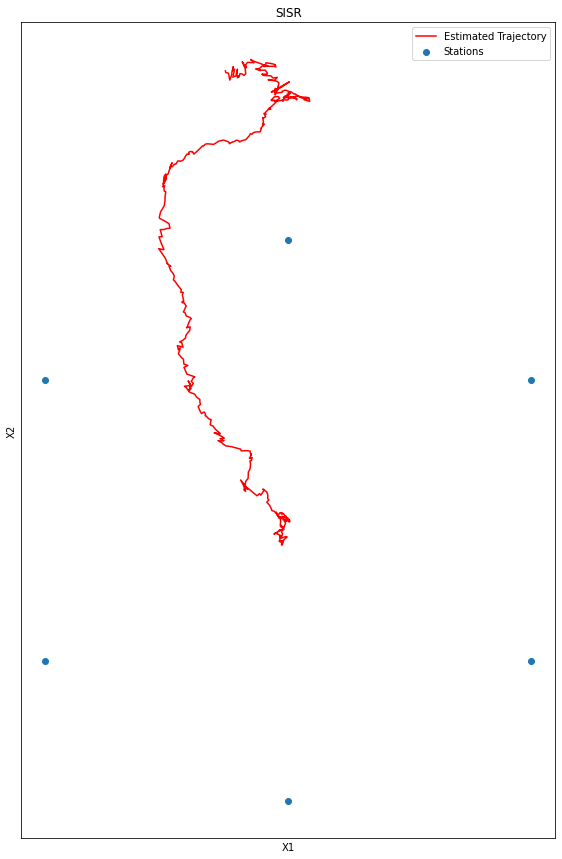

In [29]:
tau, weights, tau_most_probable = sequential_importance_sampling_resampling(Y_meas_unknown_sigma,stations, m = 501, N = 1000, varsigma = candidates[np.argmax(log_likelihoods)])

plt.figure(figsize = (15,15))
plt.title("SISR")
plt.plot(tau[0,:],tau[3,:],color = "r",label = "Estimated Trajectory")
plt.scatter(stations[:,0],stations[:,1],label = "Stations")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.gca().axes.xaxis.set_ticks([])
plt.gca().axes.yaxis.set_ticks([])
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("SISR_Real_Data_Unknown_Sigma.pdf")
plt.show()